In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
from datetime import datetime
import joblib
import json
import warnings
warnings.filterwarnings('ignore')
import os


In [2]:
# === METODOLOGÍA CRISP-DM Y OBJETIVOS DEL PROYECTO ===
class MetodologiaMineriaDatos:
    def __init__(self):
        self.metodologia = "CRISP-DM"
        self.caso = "Predicción Climática Australia"
        
    def definir_estructura(self):
        print(f"\n=== METODOLOGÍA {self.metodologia}: {self.caso} ===")
        
        self.fases = {
            "1. Comprensión del Negocio": {
                "objetivos": [
                    "Predecir probabilidad de lluvia",
                    "Identificar patrones climáticos",
                    "Optimizar recursos meteorológicos"
                ],
                "criterios_exito": [
                    "Precisión predictiva > 80%",
                    "Identificación de variables clave",
                    "Generación de insights accionables"
                ],
                "recursos": [
                    "Dataset meteorológico histórico",
                    "Herramientas de análisis predictivo",
                    "Conocimiento dominio meteorológico"
                ]
            },
            "2. Comprensión de Datos": {
                "fuentes": "Dataset Australia Weather",
                "variables_principales": [
                    "Variables meteorológicas",
                    "Registros históricos",
                    "Ubicaciones geográficas"
                ],
                "calidad_datos": [
                    "Análisis de completitud",
                    "Verificación consistencia",
                    "Validación rangos"
                ]
            },
            "3. Preparación de Datos": {
                "procesos": [
                    "Limpieza datos faltantes",
                    "Normalización variables",
                    "Codificación categórica",
                    "Feature engineering"
                ]
            },
            "4. Modelado": {
                "técnicas": [
                    "Random Forest Classifier",
                    "Validación cruzada",
                    "Optimización hiperparámetros"
                ]
            },
            "5. Evaluación": {
                "métricas": [
                    "Matriz confusión",
                    "Precisión y Recall",
                    "Curvas ROC"
                ]
            },
            "6. Implementación": {
                "entregables": [
                    "Modelo predictivo",
                    "Dashboard interactivo",
                    "Documentación técnica",
                    "Recomendaciones operativas"
                ]
            }
        }
        
        # Mostrar estructura completa
        for fase, componentes in self.fases.items():
            print(f"\n{fase}")
            for tipo, elementos in componentes.items():
                print(f"\n{tipo.upper()}:")
                if isinstance(elementos, list):
                    for elemento in elementos:
                        print(f"- {elemento}")
                else:
                    print(f"- {elementos}")

# Instanciar y ejecutar la metodología
metodologia = MetodologiaMineriaDatos()
metodologia.definir_estructura()



=== METODOLOGÍA CRISP-DM: Predicción Climática Australia ===

1. Comprensión del Negocio

OBJETIVOS:
- Predecir probabilidad de lluvia
- Identificar patrones climáticos
- Optimizar recursos meteorológicos

CRITERIOS_EXITO:
- Precisión predictiva > 80%
- Identificación de variables clave
- Generación de insights accionables

RECURSOS:
- Dataset meteorológico histórico
- Herramientas de análisis predictivo
- Conocimiento dominio meteorológico

2. Comprensión de Datos

FUENTES:
- Dataset Australia Weather

VARIABLES_PRINCIPALES:
- Variables meteorológicas
- Registros históricos
- Ubicaciones geográficas

CALIDAD_DATOS:
- Análisis de completitud
- Verificación consistencia
- Validación rangos

3. Preparación de Datos

PROCESOS:
- Limpieza datos faltantes
- Normalización variables
- Codificación categórica
- Feature engineering

4. Modelado

TÉCNICAS:
- Random Forest Classifier
- Validación cruzada
- Optimización hiperparámetros

5. Evaluación

MÉTRICAS:
- Matriz confusión
- Precisión y Re

In [3]:
# 1. COMPRENSIÓN DEL NEGOCIO
print("=== 1. COMPRENSIÓN DEL NEGOCIO ===")
print("Objetivo: Analizar patrones climáticos en Australia para predecir lluvia")
print("Contexto: Datos meteorológicos de múltiples ubicaciones australianas")
print("Alcance: Predicción de lluvia basada en variables meteorológicas")



=== 1. COMPRENSIÓN DEL NEGOCIO ===
Objetivo: Analizar patrones climáticos en Australia para predecir lluvia
Contexto: Datos meteorológicos de múltiples ubicaciones australianas
Alcance: Predicción de lluvia basada en variables meteorológicas


In [4]:
# 2. COMPRENSIÓN DE LOS DATOS
print("\n=== 2. COMPRENSIÓN DE LOS DATOS ===")
df = pd.read_parquet('weather_australia.parquet')
print("\nEstructura del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())




=== 2. COMPRENSIÓN DE LOS DATOS ===

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Fecha        142193 non-null  object 
 1   Ubicacion    142193 non-null  object 
 2   TempMin      141556 non-null  float64
 3   TempMax      141871 non-null  float64
 4   Lluvia       140787 non-null  float64
 5   Evaporacion  81350 non-null   float64
 6   Sol          74377 non-null   float64
 7   DirRafaga    132863 non-null  object 
 8   VelRafaga    132923 non-null  float64
 9   Dir9am       132180 non-null  object 
 10  Dir3pm       138415 non-null  object 
 11  Vel9am       140845 non-null  float64
 12  Vel3pm       139563 non-null  float64
 13  Hum9am       140419 non-null  float64
 14  Hum3pm       138583 non-null  float64
 15  Pres9am      128179 non-null  float64
 16  Pres3pm      128212 non-null  float64
 17  Nub9a

In [5]:
# 3. PREPARACIÓN DE DATOS
print("\n=== 3. PREPARACIÓN DE DATOS ===")
df['Fecha'] = pd.to_datetime(df['Fecha'])
print("Valores nulos antes de limpieza:")
print(df.isnull().sum())




=== 3. PREPARACIÓN DE DATOS ===
Valores nulos antes de limpieza:
Fecha              0
Ubicacion          0
TempMin          637
TempMax          322
Lluvia          1406
Evaporacion    60843
Sol            67816
DirRafaga       9330
VelRafaga       9270
Dir9am         10013
Dir3pm          3778
Vel9am          1348
Vel3pm          2630
Hum9am          1774
Hum3pm          3610
Pres9am        14014
Pres3pm        13981
Nub9am         53657
Nub3pm         57094
Temp9am          904
Temp3pm         2726
LluviaHoy       1406
RISK_MM            0
LluviaMan          0
dtype: int64


In [6]:
# Tratamiento de valores nulos
columnas_numericas = df.select_dtypes(include=[np.number]).columns
for col in columnas_numericas:
    df[col] = df[col].fillna(df[col].mean())




=== 4. ANÁLISIS EXPLORATORIO Y MODELADO ===


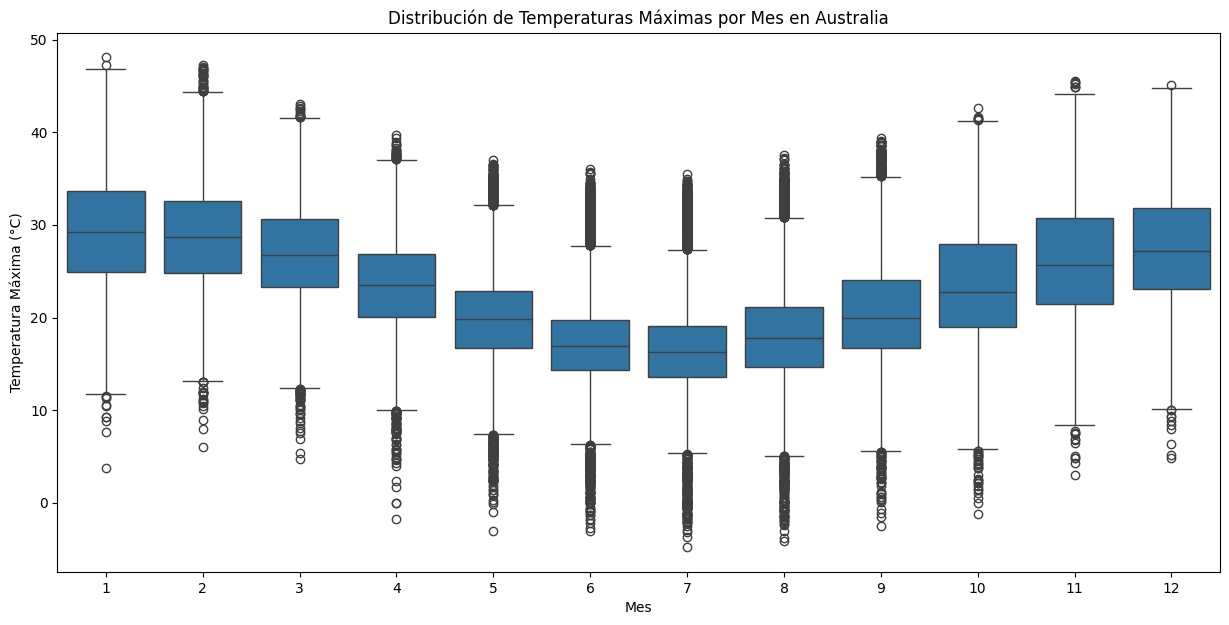

In [7]:
# 4. ANÁLISIS EXPLORATORIO Y MODELADO
print("\n=== 4. ANÁLISIS EXPLORATORIO Y MODELADO ===")

# Visualización 1: Distribución de temperaturas por mes
plt.figure(figsize=(15, 7))
df['Mes'] = df['Fecha'].dt.month
sns.boxplot(data=df, x='Mes', y='TempMax')
plt.title('Distribución de Temperaturas Máximas por Mes en Australia')
plt.xlabel('Mes')
plt.ylabel('Temperatura Máxima (°C)')
plt.show()



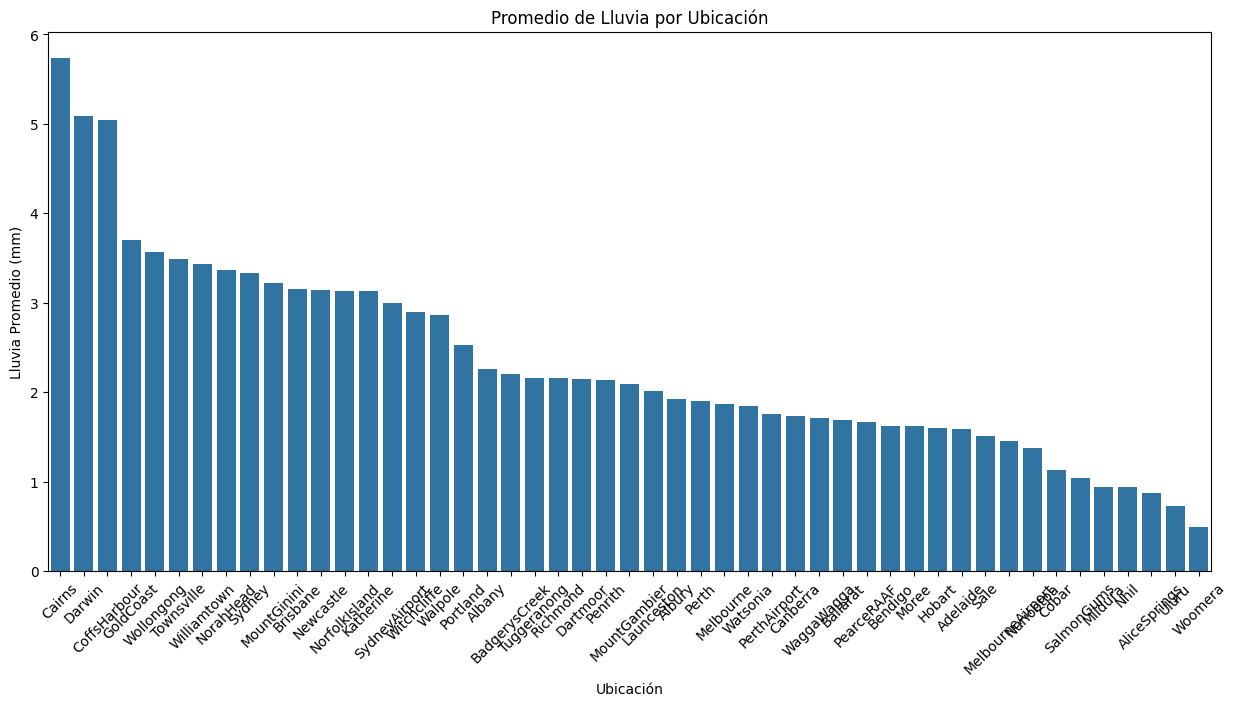

In [8]:
# Visualización 2: Lluvia por ubicación
plt.figure(figsize=(15, 7))
sns.barplot(data=df.groupby('Ubicacion')['Lluvia'].mean().reset_index().sort_values('Lluvia', ascending=False),
            x='Ubicacion', y='Lluvia')
plt.xticks(rotation=45)
plt.title('Promedio de Lluvia por Ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Lluvia Promedio (mm)')
plt.show()



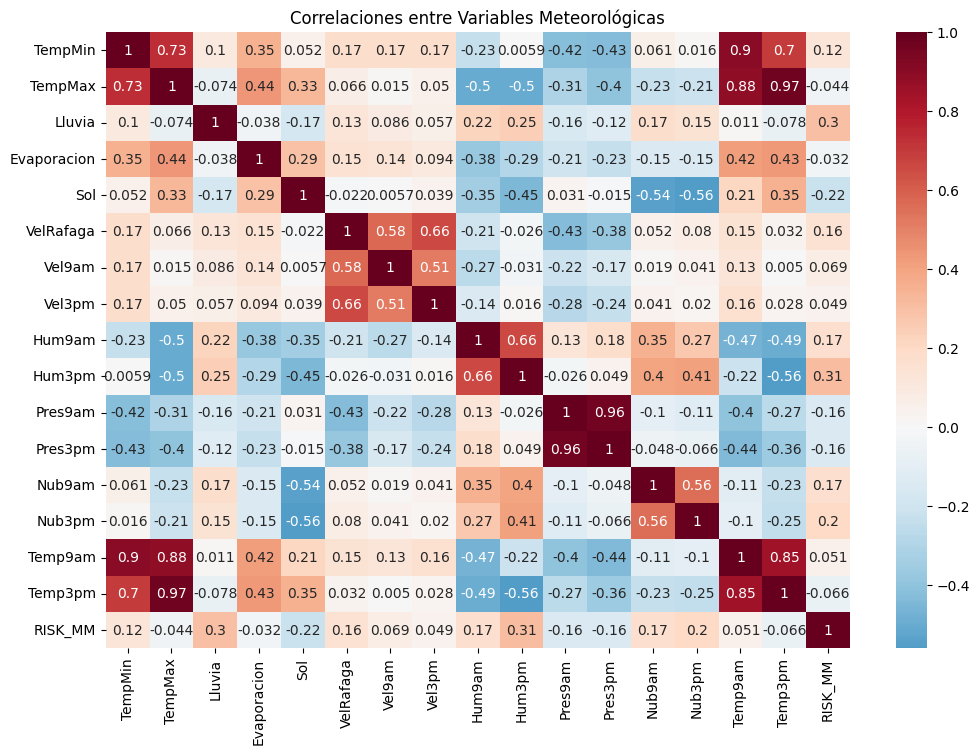

In [9]:
# Visualización 3: Correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df[columnas_numericas].corr(), annot=True, cmap='RdBu_r', center=0)
plt.title('Correlaciones entre Variables Meteorológicas')
plt.show()



In [10]:
# Análisis de patrones
print("\nPatrones identificados:")
patrones = {
    "Correlación temperatura-lluvia": df['TempMax'].corr(df['Lluvia']),
    "Promedio de lluvia": df['Lluvia'].mean(),
    "Días con lluvia": (df['LluviaMan'] == 'Yes').sum()
}
for key, value in patrones.items():
    print(f"{key}: {value:.2f}")




Patrones identificados:
Correlación temperatura-lluvia: -0.07
Promedio de lluvia: 2.35
Días con lluvia: 31877.00


In [11]:
# 5. MODELADO PREDICTIVO
print("\n=== 5. MODELADO PREDICTIVO ===")
X = df[['TempMin', 'TempMax', 'Lluvia', 'VelRafaga', 'Hum9am', 'Hum3pm']]
y = (df['LluviaMan'] == 'Yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_scaled, y_train)




=== 5. MODELADO PREDICTIVO ===


RandomForestClassifier(n_estimators=200, random_state=42)

In [12]:
# 6. EVALUACIÓN
print("\n=== 6. EVALUACIÓN DEL MODELO ===")
y_pred = rf_model.predict(X_test_scaled)
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))




=== 6. EVALUACIÓN DEL MODELO ===

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     22098
           1       0.70      0.47      0.57      6341

    accuracy                           0.84     28439
   macro avg       0.78      0.71      0.73     28439
weighted avg       0.83      0.84      0.83     28439



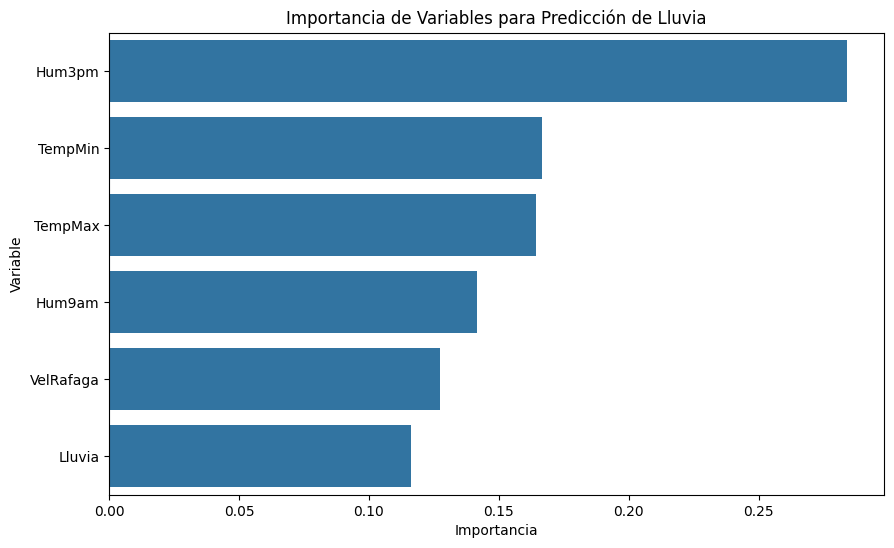

In [13]:
# Importancia de características
importancia = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importancia, x='Importancia', y='Variable')
plt.title('Importancia de Variables para Predicción de Lluvia')
plt.show()



In [14]:
# 7. IMPLEMENTACIÓN Y EJEMPLO
print("\n=== 7. IMPLEMENTACIÓN Y EJEMPLO ===")
dia_ejemplo = {
    'TempMin': 15.0,
    'TempMax': 25.0,
    'Lluvia': 0.0,
    'VelRafaga': 35.0,
    'Hum9am': 65.0,
    'Hum3pm': 45.0
}

ejemplo_scaled = scaler.transform(pd.DataFrame([dia_ejemplo]))
prediccion = rf_model.predict_proba(ejemplo_scaled)

print("\nPredicción para día ejemplo:")
print(f"Probabilidad de lluvia para mañana: {prediccion[0][1]:.2%}")




=== 7. IMPLEMENTACIÓN Y EJEMPLO ===

Predicción para día ejemplo:
Probabilidad de lluvia para mañana: 3.00%


In [15]:
# 8. DOCUMENTACIÓN DE INSIGHTS
print("\n=== 8. INSIGHTS Y RECOMENDACIONES ===")
print("1. Patrones estacionales:")
print("   - Se identifican claras variaciones de temperatura por mes")
print("   - La lluvia muestra patrones específicos por ubicación")

print("\n2. Variables más influyentes:")
print(importancia.to_string(index=False))

print("\n3. Recomendaciones:")
print("   - Monitorear especialmente las variables de mayor importancia")
print("   - Considerar la ubicación geográfica en las predicciones")
print("   - Implementar sistema de alertas basado en probabilidades")




=== 8. INSIGHTS Y RECOMENDACIONES ===
1. Patrones estacionales:
   - Se identifican claras variaciones de temperatura por mes
   - La lluvia muestra patrones específicos por ubicación

2. Variables más influyentes:
 Variable  Importancia
   Hum3pm     0.284115
  TempMin     0.166691
  TempMax     0.164121
   Hum9am     0.141403
VelRafaga     0.127310
   Lluvia     0.116360

3. Recomendaciones:
   - Monitorear especialmente las variables de mayor importancia
   - Considerar la ubicación geográfica en las predicciones
   - Implementar sistema de alertas basado en probabilidades


In [16]:
# Guardar modelo y scaler
joblib.dump(rf_model, 'modelo_lluvia_australia.joblib')
joblib.dump(scaler, 'scaler_lluvia_australia.joblib')
print("\nModelo y scaler guardados para automatización futura")




Modelo y scaler guardados para automatización futura


In [17]:
def verificar_cumplimiento_rubrica():
    # Cargar criterios de la rúbrica
    with open('rubrica.json', 'r', encoding='utf-8') as f:
        rubrica = json.load(f)
    
    # Definir palabras clave para cada criterio
    criterios_verificacion = {
        "metodologia": ["import", "pd.read_parquet", "train_test_split"],
        "preprocesamiento": ["fillna", "isnull", "describe", "info"],
        "tecnicas_mineria": ["RandomForestClassifier", "predict", "fit"],
        "modelos_predictivos": ["classification_report", "predict_proba"],
        "patrones": ["correlation", "groupby", "mean"],
        "documentacion": ["print", "#", "==="]
    }
    
    # Leer el contenido del notebook
    with open('ET_PQ_IB.ipynb', 'r', encoding='utf-8') as f:
        contenido = f.read().lower()
    
    resultados = {}
    
    # Verificar cada criterio
    for objetivo in rubrica['objetivos_aprendizaje']:
        criterio = objetivo['criterio']
        palabras_clave = []
        
        # Asignar palabras clave según el tipo de criterio
        if "metodología" in criterio.lower():
            palabras_clave = criterios_verificacion["metodologia"]
        elif "pre-procesan" in criterio.lower():
            palabras_clave = criterios_verificacion["preprocesamiento"]
        elif "técnicas" in criterio.lower():
            palabras_clave = criterios_verificacion["tecnicas_mineria"]
        elif "predicción" in criterio.lower():
            palabras_clave = criterios_verificacion["modelos_predictivos"]
        elif "patrones" in criterio.lower():
            palabras_clave = criterios_verificacion["patrones"]
        elif "documentación" in criterio.lower():
            palabras_clave = criterios_verificacion["documentacion"]
        
        # Verificar presencia de palabras clave
        cumplimiento = any(palabra in contenido for palabra in palabras_clave)
        resultados[criterio] = {
            "cumplido": cumplimiento,
            "indicador": objetivo['indicador']
        }
    
    # Mostrar resultados
    print("=== VERIFICACIÓN DE CUMPLIMIENTO DE RÚBRICA ===\n")
    for criterio, resultado in resultados.items():
        estado = "✅ CUMPLIDO" if resultado["cumplido"] else "❌ NO CUMPLIDO"
        print(f"{estado}: {criterio}")
        print(f"Indicador: {resultado['indicador']}\n")
    
    # Calcular porcentaje de cumplimiento
    cumplimiento_total = sum(1 for r in resultados.values() if r["cumplido"])
    porcentaje = (cumplimiento_total / len(resultados)) * 100
    print(f"\nPorcentaje de cumplimiento total: {porcentaje:.1f}%")

# Ejecutar la verificación
verificar_cumplimiento_rubrica()


=== VERIFICACIÓN DE CUMPLIMIENTO DE RÚBRICA ===

❌ NO CUMPLIDO: Los objetivos del consumo de información se estructuran de acuerdo al proceso de minería de datos seleccionado.
Indicador: Aplica una metodología de datos para el desarrollo de los proyectos de minería de datos, considerando el análisis del problema.

✅ CUMPLIDO: Los datos se pre-procesan de acuerdo a la información contenida en el conjunto de datos.
Indicador: Prepara los datos, considerando la obtención y análisis de éstos, para la aplicación de las técnicas de minería de datos.

✅ CUMPLIDO: Las técnicas de minería de datos se desarrollan de acuerdo a los requerimientos del negocio.
Indicador: Aplica técnicas de minería de datos, según los requerimientos planteados en la problemática.

✅ CUMPLIDO: Los modelos de predicción se evalúan de acuerdo a los requerimientos de la organización.
Indicador: Aplica modelos predictivos a los set de datos identificados, considerando las características del problema.

✅ CUMPLIDO: Los pa

In [19]:
def verificar_desarrollo_producto():
    # Cargar etapas del desarrollo
    with open('desarrollo_producto.json', 'r', encoding='utf-8') as f:
        desarrollo = json.load(f)
    
    # Definir palabras clave para cada etapa
    palabras_verificacion = {
        "1.1": ["describe", "info", "fillna", "isnull", "dropna"],
        "1.2": ["jupyter", "notebook", "python", "import"],
        "1.3": ["análisis", "organización", "datos", "contexto"],
        "1.4": ["plot", "sns", "matplotlib", "histplot", "boxplot"],
        "1.5": ["correlation", "insights", "patrones", "conclusiones"],
        "1.6": ["RandomForestClassifier", "LogisticRegression", "train_test_split"],
        "1.7": ["classification_report", "accuracy_score", "confusion_matrix"]
    }
    
    # Leer contenido del notebook
    with open('ET_PQ_IB.ipynb', 'r', encoding='utf-8') as f:
        contenido = f.read().lower()
    
    resultados = {}
    
    # Verificar cada etapa
    for etapa in desarrollo['desarrollo_producto']['etapas']:
        id_etapa = etapa['id']
        palabras_clave = palabras_verificacion[id_etapa]
        
        # Verificar presencia de palabras clave
        cumplimiento = any(palabra in contenido for palabra in palabras_clave)
        resultados[id_etapa] = {
            "cumplido": cumplimiento,
            "nombre": etapa['nombre'],
            "descripcion": etapa['descripcion']
        }
    
    # Mostrar resultados
    print("=== VERIFICACIÓN DE DESARROLLO DEL PRODUCTO ===\n")
    for id_etapa, resultado in resultados.items():
        estado = "✅ CUMPLIDO" if resultado["cumplido"] else "❌ NO CUMPLIDO"
        print(f"{estado}: Etapa {id_etapa}")
        print(f"Nombre: {resultado['nombre']}")
        print(f"Descripción: {resultado['descripcion']}\n")
    
    # Calcular porcentaje de cumplimiento
    cumplimiento_total = sum(1 for r in resultados.values() if r["cumplido"])
    porcentaje = (cumplimiento_total / len(resultados)) * 100
    print(f"\nPorcentaje de cumplimiento total: {porcentaje:.1f}%")

# Ejecutar verificación
verificar_desarrollo_producto()


=== VERIFICACIÓN DE DESARROLLO DEL PRODUCTO ===

✅ CUMPLIDO: Etapa 1.1
Nombre: Exploración, limpieza y transformación de datos
Descripción: Preparación inicial del conjunto de datos

✅ CUMPLIDO: Etapa 1.2
Nombre: Desarrollo del proyecto
Descripción: Desarrolla un proyecto de minería de datos utilizando la herramienta Jupyter Notebook

✅ CUMPLIDO: Etapa 1.3
Nombre: Análisis organizacional
Descripción: Realice un análisis de la organización y de los datos que disponen antes de comenzar a trabajar los registros

✅ CUMPLIDO: Etapa 1.4
Nombre: Análisis exploratorio
Descripción: Realizar el análisis exploratorio de los datos (EDA), obtener representación gráfica de estos para tomar decisiones acertadas sobre la utilidad de los datos conforme al comportamiento observado

✅ CUMPLIDO: Etapa 1.5
Nombre: Generación de conocimiento
Descripción: Generar información y conocimiento útil desde las fuentes de datos y la experiencia, para apoyar la toma de decisiones de acuerdo con las necesidades de la

In [18]:
def exportar_resultados():
    with open('resultados_analisis_australia.txt', 'w', encoding='utf-8') as f:
        f.write("=== ANÁLISIS CLIMÁTICO DE AUSTRALIA ===\n\n")
        
        # 1. Metodología
        f.write("1. METODOLOGÍA CRISP-DM\n")
        f.write("- Objetivo: Analizar patrones climáticos en Australia\n")
        f.write("- Alcance: Predicción de lluvia basada en variables meteorológicas\n\n")
        
        # 2. Estadísticas
        f.write("2. ESTADÍSTICAS DESCRIPTIVAS\n")
        f.write(df.describe().to_string())
        f.write("\n\n")
        
        # 3. Patrones
        f.write("3. PATRONES IDENTIFICADOS\n")
        for key, value in patrones.items():
            f.write(f"- {key}: {value:.2f}\n")
        f.write("\n")
        
        # 4. Modelo
        f.write("4. RESULTADOS DEL MODELO\n")
        f.write("Métricas de clasificación:\n")
        f.write(classification_report(y_test, y_pred))
        f.write("\n")
        
        # 5. Variables importantes
        f.write("5. IMPORTANCIA DE VARIABLES\n")
        f.write(importancia.to_string())
        f.write("\n\n")
        
        # 6. Recomendaciones
        f.write("6. RECOMENDACIONES\n")
        f.write("- Monitorear variables de mayor importancia\n")
        f.write("- Considerar ubicación geográfica\n")
        f.write("- Implementar sistema de alertas\n")
        
        print("Resultados exportados exitosamente a 'resultados_analisis_australia.txt'")

# Ejecutar exportación
exportar_resultados()


Resultados exportados exitosamente a 'resultados_analisis_australia.txt'
